# 获取 GitHub 项目进展

以下代码主要由 GPT-4 生成，演示 `GitHubClient` 模块的版本演进。


## 使用 GitHub REST API 获取项目信息

GitHub REST API 为开发者提供了便捷获取 GitHub 项目的丰富 API。

![Github Docs](images/github_docs.png)

例如，获取项目 issues 列表，GitHub 提供了 `"List repository issues"` API。 


## GitHub Token 配置

使用 `GitHubClient` 模块调用 GitHub REST API 需要配置 [GitHub Fine-grained personal access token](https://github.com/settings/tokens?type=beta)。

- **配置文件**：正式启动 GitHubSentinel 项目，可以替换 `config.json` 中 `github_token` 值。
- **Jupyter测试**：在使用构造函数实例化 GitHubClient 类，以参数形式传入。

下面以 https://github.com/langchain-ai/langchain 项目为例，演示 GitHubClient 使用方法

## [v0.2] GitHubClient Class 

In [ ]:
# src/github_client.py

import requests  # 导入requests库用于发起HTTP请求
import datetime  # 导入datetime库处理日期和时间

class GitHubClient:
    def __init__(self, token):
        self.token = token  # GitHub的访问令牌
        # 初始化请求头部，这里主要是为了使用GitHub的API进行身份验证
        self.headers = {'Authorization': f'token {self.token}'}

    def fetch_updates(self, repos):
        # 为给定的仓库列表获取更新，包括提交、问题和拉取请求
        updates = {}
        for repo in repos:
            # 遍历每个仓库并获取相关信息
            updates[repo] = {
                'commits': self.fetch_commits(repo),  # 获取提交记录
                'issues': self.fetch_issues(repo),   # 获取问题
                'pull_requests': self.fetch_pull_requests(repo)  # 获取拉取请求
            }
        return updates

    def fetch_commits(self, repo):
        # 构建获取提交记录的API URL
        url = f'https://api.github.com/repos/{repo}/commits'
        response = requests.get(url, headers=self.headers)
        response.raise_for_status()  # 检查请求是否成功，如果出错则抛出异常
        return response.json()  # 返回解析JSON格式的数据

    def fetch_issues(self, repo):
        # 构建获取问题(issue)的API URL
        url = f'https://api.github.com/repos/{repo}/issues'
        response = requests.get(url, headers=self.headers)
        response.raise_for_status()  # 确保响应没有HTTP错误
        return response.json()  # 返回JSON数据

    def fetch_pull_requests(self, repo):
        # 构建获取拉取请求(pull requests)的API URL
        url = f'https://api.github.com/repos/{repo}/pulls'
        response = requests.get(url, headers=self.headers)
        response.raise_for_status()
        return response.json()  # 返回JSON格式的拉取请求数据

    def export_daily_progress(self, repo):
        # 导出指定仓库的每日进度，包括问题和拉取请求
        date_str = datetime.datetime.now().strftime('%Y-%m-%d')  # 获取当前日期字符串
        issues = self.fetch_issues(repo)  # 获取当天的问题
        pull_requests = self.fetch_pull_requests(repo)  # 获取当天的拉取请求
        filename = f"{repo.replace('/', '_')}_{date_str}.md"  # 根据仓库名和日期生成文件名

        # 打开文件进行写入
        with open(filename, 'w') as f:
            f.write(f"# {repo} Daily Progress - {date_str}\n\n")  # 写入标题
            f.write("## Issues\n")
            for issue in issues:
                f.write(f"- {issue['title']} #{issue['number']}\n")  # 列出每个问题
            f.write("\n## Pull Requests\n")
            for pr in pull_requests:
                f.write(f"- {pr['title']} #{pr['number']}\n")  # 列出每个拉取请求

        print(f"Exported daily progress to {filename}")  # 打印导出信息

        return filename


### 实例化 GitHubClient

从环境变量中获取 `GITHUB_TOKEN`，依次获取 Commits, Issues 和 Pull Requests。

In [ ]:
import os

github_client = GitHubClient(token=os.getenv("GITHUB_TOKEN"))

### List Issues API

API完整文档说明见：https://docs.github.com/en/rest/issues/issues?apiVersion=2022-11-28#list-repository-issues

**请求样例**：`GET /repos/{owner}/{repo}/issues`;

**返回样例**：

```json
[
  {
    "id": 1,
    "node_id": "MDU6SXNzdWUx",
    "url": "https://api.github.com/repos/octocat/Hello-World/issues/1347",
    "repository_url": "https://api.github.com/repos/octocat/Hello-World",
    "labels_url": "https://api.github.com/repos/octocat/Hello-World/issues/1347/labels{/name}",
    "comments_url": "https://api.github.com/repos/octocat/Hello-World/issues/1347/comments",
    "events_url": "https://api.github.com/repos/octocat/Hello-World/issues/1347/events",
    "html_url": "https://github.com/octocat/Hello-World/issues/1347",
    "number": 1347,
    "state": "open",
    "title": "Found a bug",
    "body": "I'm having a problem with this.",
    "user": {
      "login": "octocat",
      "id": 1,
      "node_id": "MDQ6VXNlcjE=",
      "avatar_url": "https://github.com/images/error/octocat_happy.gif",
      "gravatar_id": "",
      "url": "https://api.github.com/users/octocat",
      "html_url": "https://github.com/octocat",
      "followers_url": "https://api.github.com/users/octocat/followers",
      "following_url": "https://api.github.com/users/octocat/following{/other_user}",
      "gists_url": "https://api.github.com/users/octocat/gists{/gist_id}",
      "starred_url": "https://api.github.com/users/octocat/starred{/owner}{/repo}",
      "subscriptions_url": "https://api.github.com/users/octocat/subscriptions",
      "organizations_url": "https://api.github.com/users/octocat/orgs",
      "repos_url": "https://api.github.com/users/octocat/repos",
      "events_url": "https://api.github.com/users/octocat/events{/privacy}",
      "received_events_url": "https://api.github.com/users/octocat/received_events",
      "type": "User",
      "site_admin": false
    },
    "labels": [
      {
        "id": 208045946,
        "node_id": "MDU6TGFiZWwyMDgwNDU5NDY=",
        "url": "https://api.github.com/repos/octocat/Hello-World/labels/bug",
        "name": "bug",
        "description": "Something isn't working",
        "color": "f29513",
        "default": true
      }
    ],
    "assignee": {
      "login": "octocat",
      "id": 1,
      "node_id": "MDQ6VXNlcjE=",
      "avatar_url": "https://github.com/images/error/octocat_happy.gif",
      "gravatar_id": "",
      "url": "https://api.github.com/users/octocat",
      "html_url": "https://github.com/octocat",
      "followers_url": "https://api.github.com/users/octocat/followers",
      "following_url": "https://api.github.com/users/octocat/following{/other_user}",
      "gists_url": "https://api.github.com/users/octocat/gists{/gist_id}",
      "starred_url": "https://api.github.com/users/octocat/starred{/owner}{/repo}",
      "subscriptions_url": "https://api.github.com/users/octocat/subscriptions",
      "organizations_url": "https://api.github.com/users/octocat/orgs",
      "repos_url": "https://api.github.com/users/octocat/repos",
      "events_url": "https://api.github.com/users/octocat/events{/privacy}",
      "received_events_url": "https://api.github.com/users/octocat/received_events",
      "type": "User",
      "site_admin": false
    },
    "assignees": [
      {
        "login": "octocat",
        "id": 1,
        "node_id": "MDQ6VXNlcjE=",
        "avatar_url": "https://github.com/images/error/octocat_happy.gif",
        "gravatar_id": "",
        "url": "https://api.github.com/users/octocat",
        "html_url": "https://github.com/octocat",
        "followers_url": "https://api.github.com/users/octocat/followers",
        "following_url": "https://api.github.com/users/octocat/following{/other_user}",
        "gists_url": "https://api.github.com/users/octocat/gists{/gist_id}",
        "starred_url": "https://api.github.com/users/octocat/starred{/owner}{/repo}",
        "subscriptions_url": "https://api.github.com/users/octocat/subscriptions",
        "organizations_url": "https://api.github.com/users/octocat/orgs",
        "repos_url": "https://api.github.com/users/octocat/repos",
        "events_url": "https://api.github.com/users/octocat/events{/privacy}",
        "received_events_url": "https://api.github.com/users/octocat/received_events",
        "type": "User",
        "site_admin": false
      }
    ],
    "milestone": {
      "url": "https://api.github.com/repos/octocat/Hello-World/milestones/1",
      "html_url": "https://github.com/octocat/Hello-World/milestones/v1.0",
      "labels_url": "https://api.github.com/repos/octocat/Hello-World/milestones/1/labels",
      "id": 1002604,
      "node_id": "MDk6TWlsZXN0b25lMTAwMjYwNA==",
      "number": 1,
      "state": "open",
      "title": "v1.0",
      "description": "Tracking milestone for version 1.0",
      "creator": {
        "login": "octocat",
        "id": 1,
        "node_id": "MDQ6VXNlcjE=",
        "avatar_url": "https://github.com/images/error/octocat_happy.gif",
        "gravatar_id": "",
        "url": "https://api.github.com/users/octocat",
        "html_url": "https://github.com/octocat",
        "followers_url": "https://api.github.com/users/octocat/followers",
        "following_url": "https://api.github.com/users/octocat/following{/other_user}",
        "gists_url": "https://api.github.com/users/octocat/gists{/gist_id}",
        "starred_url": "https://api.github.com/users/octocat/starred{/owner}{/repo}",
        "subscriptions_url": "https://api.github.com/users/octocat/subscriptions",
        "organizations_url": "https://api.github.com/users/octocat/orgs",
        "repos_url": "https://api.github.com/users/octocat/repos",
        "events_url": "https://api.github.com/users/octocat/events{/privacy}",
        "received_events_url": "https://api.github.com/users/octocat/received_events",
        "type": "User",
        "site_admin": false
      },
      "open_issues": 4,
      "closed_issues": 8,
      "created_at": "2011-04-10T20:09:31Z",
      "updated_at": "2014-03-03T18:58:10Z",
      "closed_at": "2013-02-12T13:22:01Z",
      "due_on": "2012-10-09T23:39:01Z"
    },
    "locked": true,
    "active_lock_reason": "too heated",
    "comments": 0,
    "pull_request": {
      "url": "https://api.github.com/repos/octocat/Hello-World/pulls/1347",
      "html_url": "https://github.com/octocat/Hello-World/pull/1347",
      "diff_url": "https://github.com/octocat/Hello-World/pull/1347.diff",
      "patch_url": "https://github.com/octocat/Hello-World/pull/1347.patch"
    },
    "closed_at": null,
    "created_at": "2011-04-22T13:33:48Z",
    "updated_at": "2011-04-22T13:33:48Z",
    "closed_by": {
      "login": "octocat",
      "id": 1,
      "node_id": "MDQ6VXNlcjE=",
      "avatar_url": "https://github.com/images/error/octocat_happy.gif",
      "gravatar_id": "",
      "url": "https://api.github.com/users/octocat",
      "html_url": "https://github.com/octocat",
      "followers_url": "https://api.github.com/users/octocat/followers",
      "following_url": "https://api.github.com/users/octocat/following{/other_user}",
      "gists_url": "https://api.github.com/users/octocat/gists{/gist_id}",
      "starred_url": "https://api.github.com/users/octocat/starred{/owner}{/repo}",
      "subscriptions_url": "https://api.github.com/users/octocat/subscriptions",
      "organizations_url": "https://api.github.com/users/octocat/orgs",
      "repos_url": "https://api.github.com/users/octocat/repos",
      "events_url": "https://api.github.com/users/octocat/events{/privacy}",
      "received_events_url": "https://api.github.com/users/octocat/received_events",
      "type": "User",
      "site_admin": false
    },
    "author_association": "COLLABORATOR",
    "state_reason": "completed"
  }
]
```

In [ ]:
repo = "langchain-ai/langchain"

In [ ]:
issues = github_client.fetch_issues(repo)


### GitHubClient fetch 方法 repo 参数格式要求

从 GitHub 获取项目进展，需要访问形如 `https://api.github.com/repos/{repo}/issues`(以issues为例）的 URL。因此，repo 必须符合 GitHub Repo 标准命名，如下所示:

```json
[
    "langchain-ai/langchain",
    "DjangoPeng/openai-quickstart",
    "ollama/ollama"
]
```

**GitHubSentinel 项目订阅管理配置文件为 `subscriptions.json`。**

In [ ]:
issues

### List Pull Requests API

API完整文档说明见：https://docs.github.com/en/rest/pulls/pulls?apiVersion=2022-11-28#list-pull-requests

**请求样例**：`GET /repos/{owner}/{repo}/pulls`;



In [ ]:
pull_requests = github_client.fetch_pull_requests(repo)

In [ ]:
pull_requests

### List Commits API

API完整文档说明见：https://docs.github.com/en/rest/commits/commits?apiVersion=2022-11-28

**请求样例**：`GET /repos/{owner}/{repo}/commits`;


In [ ]:
commits = github_client.fetch_commits(repo)

In [ ]:
commits

## 解析导出每日进展

API 请求返回结构过于复杂，我们先解析 `title` 字段，即仅查看和总结 GitHub 项目 Issues list 和 PRs List 标题。如下所示：

![Issues](images/issues.png)

https://github.com/langchain-ai/langchain/issues

In [ ]:
github_client.export_daily_progress(repo)

### 查看文档 发现问题并不简单😈😈

#### Note: Every pull request is an issue

> GitHub's REST API considers every pull request an issue, but not every issue is a pull request. For this reason, "Issues" endpoints may return both issues and pull requests in the response. You can identify pull requests by the pull_request key. Be aware that the id of a pull request returned from "Issues" endpoints will be an issue id. To find out the pull request id, use the "List pull requests" endpoint.

# 支持条件筛选的 GitHub 项目进展获取

实际开发场景中，项目进展通常不是刚好以天为周期时。因此，这便暴露出v0.2版本的 `GitHubClient` 在信息获取方面的局限性。


下面我们扩展 v0.2 版本的 `GitHubClient`，使其支持根据筛选条件获取 GitHub 项目的 Issues 和 Pull Requests。首要支持的筛选条便是**研发周期（时间段）**，**已合并的PR** 和 **已关闭的Issues**：

![langchain_week_progress](images/langchain_week_progress.jpg)

通过阅读 GitHub API 文档（https://docs.github.com/en/rest/issues/issues?apiVersion=2022-11-28#list-repository-issues--code-samples ），我们便能了解最关键的2个字段是：

- state(string): Indicates the state of the issues to return.
    - Default: open
    - Can be one of: open, closed, all
- since(string): Only show results that were last updated after the given time. This is a timestamp in ISO 8601 format: YYYY-MM-DDTHH:MM:SSZ.

从功能完整性角度，我们还可以增加一个 `until` 条件，以支持研发周期的结束时间筛选。😈😈


下面以 Langchain 项目 (https://github.com/langchain-ai/langchain) 为例，展示如何使用扩展后的 GitHubClient

## [v0.3] GitHubClient Class 

In [ ]:
# src/logger.py
from loguru import logger
import sys

# Configure Loguru
logger.remove()  # Remove the default logger
logger.add(sys.stdout, level="DEBUG", format="{time} {level} {message}", colorize=True)
logger.add("logs/app.log", rotation="1 MB", level="DEBUG")

# Alias the logger for easier import
LOG = logger

# Make the logger available for import with the alias
__all__ = ["LOG"]


# src/github_client.py

import requests  # 导入requests库用于HTTP请求
from datetime import datetime, date, timedelta  # 导入日期处理模块
import os  # 导入os模块用于文件和目录操作
# from logger import LOG  # 导入日志模块（演示时直接导入）

class GitHubClient:
    def __init__(self, token):
        self.token = token  # GitHub API令牌
        self.headers = {'Authorization': f'token {self.token}'}  # 设置HTTP头部认证信息

    def fetch_updates(self, repo, since=None, until=None):
        # 获取指定仓库的更新，可以指定开始和结束日期
        updates = {
            'commits': self.fetch_commits(repo, since, until),  # 获取提交记录
            'issues': self.fetch_issues(repo, since, until),  # 获取问题
            'pull_requests': self.fetch_pull_requests(repo, since, until)  # 获取拉取请求
        }
        return updates

    def fetch_commits(self, repo, since=None, until=None):
        url = f'https://api.github.com/repos/{repo}/commits'  # 构建获取提交的API URL
        params = {}
        if since:
            params['since'] = since  # 如果指定了开始日期，添加到参数中
        if until:
            params['until'] = until  # 如果指定了结束日期，添加到参数中

        response = requests.get(url, headers=self.headers, params=params)
        response.raise_for_status()  # 检查请求是否成功
        return response.json()  # 返回JSON格式的数据

    def fetch_issues(self, repo, since=None, until=None):
        url = f'https://api.github.com/repos/{repo}/issues'  # 构建获取问题的API URL
        params = {
            'state': 'closed',  # 仅获取已关闭的问题
            'since': since,
            'until': until
        }
        response = requests.get(url, headers=self.headers, params=params)
        response.raise_for_status()
        return response.json()

    def fetch_pull_requests(self, repo, since=None, until=None):
        url = f'https://api.github.com/repos/{repo}/pulls'  # 构建获取拉取请求的API URL
        params = {
            'state': 'closed',  # 仅获取已合并的拉取请求
            'since': since,
            'until': until
        }
        response = requests.get(url, headers=self.headers, params=params)
        response.raise_for_status()
        return response.json()

    def export_daily_progress(self, repo):
        today = datetime.now().date().isoformat()  # 获取今天的日期
        updates = self.fetch_updates(repo, since=today)  # 获取今天的更新数据
        
        repo_dir = os.path.join('daily_progress', repo.replace("/", "_"))  # 构建存储路径
        os.makedirs(repo_dir, exist_ok=True)  # 确保目录存在
        
        file_path = os.path.join(repo_dir, f'{today}.md')  # 构建文件路径
        with open(file_path, 'w') as file:
            file.write(f"# Daily Progress for {repo} ({today})\n\n")
            file.write("\n## Issues Closed Today\n")
            for issue in updates['issues']:  # 写入今天关闭的问题
                file.write(f"- {issue['title']} #{issue['number']}\n")
            file.write("\n## Pull Requests Merged Today\n")
            for pr in updates['pull_requests']:  # 写入今天合并的拉取请求
                file.write(f"- {pr['title']} #{pr['number']}\n")
        
        LOG.info(f"Exported daily progress to {file_path}")  # 记录日志
        return file_path

    def export_progress_by_date_range(self, repo, days):
        today = date.today()  # 获取当前日期
        since = today - timedelta(days=days)  # 计算开始日期
        
        updates = self.fetch_updates(repo, since=since.isoformat(), until=today.isoformat())  # 获取指定日期范围内的更新
        
        repo_dir = os.path.join('daily_progress', repo.replace("/", "_"))  # 构建目录路径
        os.makedirs(repo_dir, exist_ok=True)  # 确保目录存在
        
        # 更新文件名以包含日期范围
        date_str = f"{since}_to_{today}"
        file_path = os.path.join(repo_dir, f'{date_str}.md')  # 构建文件路径
        
        with open(file_path, 'w') as file:
            file.write(f"# Progress for {repo} ({since} to {today})\n\n")
            file.write(f"\n## Issues Closed in the Last {days} Days\n")
            for issue in updates['issues']:  # 写入在指定日期内关闭的问题
                file.write(f"- {issue['title']} #{issue['number']}\n")
            file.write("\n## Pull Requests Merged in the Last {days} Days\n")
            for pr in updates['pull_requests']:  # 写入在指定日期内合并的拉取请求
                file.write(f"- {pr['title']} #{pr['number']}\n")
        
        LOG.info(f"Exported time-range progress to {file_path}")  # 记录日志
        return file_path

In [ ]:
# 实例化 v0.3 版本的 GitHub Client
github_client = GitHubClient(token=os.getenv("GITHUB_TOKEN"))

### 获取过去1天 LangChain 进展（已关闭的Issues）

In [ ]:
# 获取今天的日期，从午夜开始，ISO 8601格式
today = datetime.now().replace(hour=0, minute=0, second=0, microsecond=0).isoformat()

# 获取今天关闭的Issues
closed_issues_today = github_client.fetch_issues(repo='langchain-ai/langchain', since=today, until=today)

# 打印今天关闭的Issues标题
for issue in closed_issues_today:
    print(f"Issue #{issue['number']}: {issue['title']} (关闭时间 {issue['closed_at']})")


In [ ]:
# 获取过去3天的日期
three_days_ago = datetime.now() - timedelta(days=3)
three_days_ago = three_days_ago.replace(hour=0, minute=0, second=0, microsecond=0).isoformat()

# 获取过去3天关闭的Issues
closed_issues_last_3_days = github_client.fetch_issues(repo='langchain-ai/langchain', since=three_days_ago, until=today)

# 打印过去3天关闭的Issues标题
for issue in closed_issues_last_3_days:
    print(f"Issue #{issue['number']}: {issue['title']} (关闭时间 {issue['closed_at']})")


## 优化导出文件管理

考虑到 GitHubSentinel 项目长期运行将会生成一大批项目进展文件，因此将所有进展文件统一存储在`daily_progress` 目录下，并按照 `{owners}_{repo}/{since_day}_{until_day}.md` 方式命名。

如下所示：

```shell
daily_progress
├── langchain-ai_langchain
│   ├── 2024-08-04.md
│   ├── 2024-08-04_report.md
│   ├── 2024-08-18.md
│   └── 2024-08-18_report.md
├── llm_logs.log
├── ollama_ollama
│   ├── 2024-07-30_to_2024-08-04.md
│   ├── 2024-07-30_to_2024-08-04_report.md
│   ├── 2024-08-02_to_2024-08-04.md
│   ├── 2024-08-02_to_2024-08-04_report.md
│   ├── 2024-08-04.md
│   └── 2024-08-04_report.md
```

In [ ]:
github_client.export_progress_by_date_range(repo='langchain-ai/langchain', days=3)

In [ ]:
github_client.export_daily_progress(repo='langchain-ai/langchain')

### Homework: [可选] 尝试扩展 GitHubClient，使其支持 Since + Until 参数的特定时间段筛选
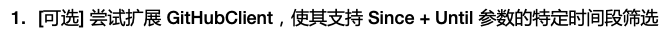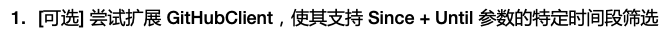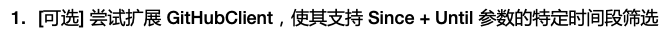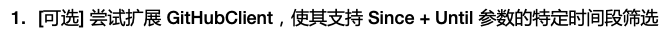